In [1]:
!pip install imblearn
!pip install ultimate==2.1.2
!pip install scikit-learn-intelex

In [2]:
import imblearn
print(imblearn.__version__)
from itertools import *
import os
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import pickle

0.9.0


In [3]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

# Data Reading

In [4]:
df = pd.read_csv('df_test.csv')

In [5]:
print(df.columns[:50])

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [6]:
print(df.columns[50:])

Index(['ECE_Flag_Count', 'Down_Up_Ratio', 'Average_Packet_Size',
       'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Fwd_Header_Length.1',
       'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate',
       'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate',
       'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets',
       'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min', 'Label'],
      dtype='object')


In [7]:
df.shape

(424182, 79)

In [8]:
df

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,53,61388,2,2,58,162,29,29,29.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,53,66223,1,1,41,57,41,41,41.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,80,15102,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,10702,239024,14,6,18449,0,2920,0,1317.785714,1184.968820,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,2043,70,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,PortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424177,443,23571,5,2,0,0,0,0,0.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
424178,80,8833423,27,36,1007,51141,341,0,37.296296,107.507000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
424179,57303,1481,3,1,31,6,31,0,10.333333,17.897858,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
424180,80,14928235,8,6,666,11632,666,0,83.250000,235.466558,...,32,869.0,0.0,869,869,9922304.0,0.0,9922304,9922304,DoS GoldenEye


In [9]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [10]:
df.columns = col_names

In [11]:
df = df.sample(n=70000)

In [12]:
data_transpose = df.T
print(data_transpose)
data_transpose.duplicated().sum()

                             414241       313143  150395  125494    370180  \
Destination_Port                 53          443      53   49314        80   
Flow_Duration                   145     75304298     214       4      7661   
Total_Fwd_Packets                 2           20       2       2         3   
Total_Backward_Packets            2           25       2       0         6   
Total_Length_of_Fwd_Packets      64         1491      60     124       380   
...                             ...          ...     ...     ...       ...   
Idle_Mean                       0.0   10000000.0     0.0     0.0       0.0   
Idle_Std                        0.0  11303.18797     0.0     0.0       0.0   
Idle_Max                          0     10000000       0       0         0   
Idle_Min                          0      9997682       0       0         0   
Label                        BENIGN       BENIGN  BENIGN  BENIGN  DoS Hulk   

                             415955  315295    121424  12655   

15

In [13]:
data_transpose.duplicated(subset=None, keep='first')
data_transpose.duplicated().sum()/len(df)

0.00016666666666666666

In [14]:
# making a bool series
bool_series = data_transpose.duplicated()
# displaying data
data_transpose.head()
# display data
data_transpose[bool_series]

,414241,313143,150395,125494,370180,415955,315295,121424,12655,48065,...,91577,258265,361884,196358,6171,105460,323816,307385,423193,331343
Bwd_URG_Flags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SYN_Flag_Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CWE_Flag_Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ECE_Flag_Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Avg_Fwd_Segment_Size,32.0,74.55,30.0,62.0,126.666667,71.0,0.0,0.0,44.0,29.6,...,46.0,51.142857,30.0,44.0,45.0,2.0,2.0,6.0,42.0,18.5
Fwd_Header_Length,64,420,64,40,104,64,32,40,64,336,...,40,220,64,40,40,48,48,60,64,64
Fwd_Avg_Bytes_Bulk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fwd_Avg_Packets_Bulk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fwd_Avg_Bulk_Rate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bwd_Avg_Bytes_Bulk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data_transpose.shape

(79, 90000)

In [16]:
data_transpose = data_transpose[~bool_series]

In [17]:
df = data_transpose.T

In [18]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length',
       'Fwd_Packets_s', 'Bwd_Packets_s', 'Min_Packet_Length',
       'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std',
       'Packet_Length_Variance', 'FIN_Flag_Count', 'RST_Flag_Count',
       'PSH_Flag_C

In [19]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
414241,53,145,2,2,64,96,32,32,32.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
313143,443,75304298,20,25,1491,18481,517,0,74.55,159.790809,...,20,64621.28571,106067.6048,305160,24504,10000000.0,11303.18797,10000000,9997682,BENIGN
150395,53,214,2,2,60,266,30,30,30.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
125494,49314,4,2,0,124,0,62,62,62.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
370180,80,7661,3,6,380,11595,380,0,126.666667,219.393102,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk


In [20]:
def RForest_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=0.02), y.sample(frac=0.02),test_size=0.2,random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train.values.reshape(-1,1), y_train)
    y_test_predict = clf.predict(X_test.values.reshape(-1,1))
    clf.score(X_test.values.reshape(-1,1),y_test)
    print(classification_report(y_test,y_test_predict))

# Data Cleaning

In [21]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.isnull().any().any()

False

In [22]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
414241,53,145,2,2,64,96,32,32,32.000000,0.000000,...,32,0.00000,0.0000,0,0,0.0,0.00000,0,0,BENIGN
313143,443,75304298,20,25,1491,18481,517,0,74.550000,159.790809,...,20,64621.28571,106067.6048,305160,24504,10000000.0,11303.18797,10000000,9997682,BENIGN
150395,53,214,2,2,60,266,30,30,30.000000,0.000000,...,32,0.00000,0.0000,0,0,0.0,0.00000,0,0,BENIGN
125494,49314,4,2,0,124,0,62,62,62.000000,0.000000,...,20,0.00000,0.0000,0,0,0.0,0.00000,0,0,BENIGN
370180,80,7661,3,6,380,11595,380,0,126.666667,219.393102,...,32,0.00000,0.0000,0,0,0.0,0.00000,0,0,DoS Hulk


In [23]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length',
       'Fwd_Packets_s', 'Bwd_Packets_s', 'Min_Packet_Length',
       'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std',
       'Packet_Length_Variance', 'FIN_Flag_Count', 'RST_Flag_Count',
       'PSH_Flag_C

In [24]:
df.loc[df.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
df.loc[df.Label == 'Web Attack � XSS', ['Label']] = 'XSS'
df.loc[df.Label == 'Web Attack � Sql Injection', ['Label']] = 'SQL'

In [25]:
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [26]:
df.duplicated(subset=None, keep='first')

414241    False
313143    False
150395    False
125494    False
370180    False
          ...  
105460    False
323816    False
307385    False
423193    False
331343    False
Length: 90000, dtype: bool

In [27]:
df.duplicated().sum()/len(df)

0.03475555555555555

In [28]:
# making a bool series
bool_series = df.duplicated() 
# displaying data
df.head()
# display data
df[bool_series]

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack
278913,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
30574,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
67001,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
201414,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
387571,80,3,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392004,443,3,2,0,12,0,6,6,6.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
245489,80,4,3,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
111987,80,4,2,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
399333,53,134,2,2,88,120,44,44,44.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [29]:
df.shape

(90000, 65)

In [30]:
df = df[~bool_series].reset_index(drop=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86872 entries, 0 to 86871
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination_Port             86872 non-null  int64  
 1   Flow_Duration                86872 non-null  int64  
 2   Total_Fwd_Packets            86872 non-null  int64  
 3   Total_Backward_Packets       86872 non-null  int64  
 4   Total_Length_of_Fwd_Packets  86872 non-null  int64  
 5   Total_Length_of_Bwd_Packets  86872 non-null  int64  
 6   Fwd_Packet_Length_Max        86872 non-null  int64  
 7   Fwd_Packet_Length_Min        86872 non-null  int64  
 8   Fwd_Packet_Length_Mean       86872 non-null  float64
 9   Fwd_Packet_Length_Std        86872 non-null  float64
 10  Bwd_Packet_Length_Max        86872 non-null  int64  
 11  Bwd_Packet_Length_Min        86872 non-null  int64  
 12  Bwd_Packet_Length_Mean       86872 non-null  float64
 13  Bwd_Packet_Lengt

In [32]:
def explore_unique_values_min(train_data, y_hat):
        
        muestra_fs = train_data
        one_value = []
        list_one_value = []
        list_individual_values = []
        drop_columns= []
        list_min_values = []
        
        for col in muestra_fs.columns:
            col_values = muestra_fs[col].value_counts()
            print('=======================', col, '=======================')
            print('Unique values {} percentage {} % '.format(muestra_fs[col].nunique(), (muestra_fs[col].nunique()/len(muestra_fs))*100))
            if (muestra_fs[col].nunique() <= 300):
                print(muestra_fs[col].unique() )
                print('Count_by_unique: ')
                print(muestra_fs[col].value_counts())
            else:
                print(muestra_fs[col].unique()[:5], '...')
            
            if(col == y_hat):            
                for i in range(0, len(muestra_fs[col].value_counts())):
                    print(col_values.index[i], col_values.iloc[i], (col_values.iloc[i] / len(muestra_fs[col]))*100)
                    if (col_values.iloc[i] < 21) | (((col_values.iloc[i] / len(muestra_fs[col]))*100)<0.01) :
                        print('unique labels to drop', col_values.index[i])
                        list_min_values.append(col_values.index[i])

            if (muestra_fs[col].nunique() == 1):
                one_value.append(col)
                one_value.append(muestra_fs[col].unique())

                drop_columns.append(col)
            if  ((muestra_fs[col].nunique()/len(muestra_fs))*100) == 100:
                list_individual_values.append(col)
                drop_columns.append(col)


        print("The columns with one value are: \n",one_value )      
        print("The columns with individual values are: \n",list_individual_values )   
        print("The total drop columns  are: \n", drop_columns )    
        
       
        return drop_columns, list_min_values

In [33]:
drop_col, list_min_drop = explore_unique_values_min(df, 'Label')

======================= Destination_Port =======================
Unique values 11707 percentage 13.476148816649783 % 
[   53   443 49314    80 37152] ...
======================= Flow_Duration =======================
Unique values 48986 percentage 56.38870982595082 % 
[     145 75304298      214        4     7661] ...
======================= Total_Fwd_Packets =======================
Unique values 299 percentage 0.34418454738005344 % 
[     2     20      3      1     10      4     21     15     56     11
      6      8     64     22      5      9     23     42     57     13
     19      7     17     16     41     29     14     24     12     18
    104     27     48     35     28     26     43     32    949    145
     25     82     74     37     38    248     33     40    125     65
    147     60     52     34     39    261     30    200     31    141
     46    194    135     70     49     44    591    225    123     36
     66     53     77     86     58    108    247    903     62   

======================= Bwd_IAT_Min =======================
Unique values 4229 percentage 4.868081775485772 % 
[ 3  2 48  0 16] ...
======================= Fwd_PSH_Flags =======================
Unique values 2 percentage 0.002302237775117414 % 
[0 1]
Count_by_unique: 
0    82809
1     4063
Name: Fwd_PSH_Flags, dtype: int64
======================= Bwd_PSH_Flags =======================
Unique values 1 percentage 0.001151118887558707 % 
[0]
Count_by_unique: 
0    86872
Name: Bwd_PSH_Flags, dtype: int64
======================= Fwd_URG_Flags =======================
Unique values 2 percentage 0.002302237775117414 % 
[0 1]
Count_by_unique: 
0    86863
1        9
Name: Fwd_URG_Flags, dtype: int64
======================= Fwd_Header_Length =======================
Unique values 751 percentage 0.8644902845565889 % 
[ 64 420  40 104  32] ...
======================= Bwd_Header_Length =======================
Unique values 805 percentage 0.9266507044847592 % 
[ 64 512   0 200  32] ...
================

In [34]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags'] ['XSS', 'SQL', 'Infiltration']


In [35]:
df.shape

(86872, 65)

In [36]:
df.drop(drop_col, axis=1, inplace=True)

In [37]:
for drop_row in list_min_drop:
    df = df[df.Label != drop_row]

In [38]:
df.shape

(86851, 64)

# Preprocessing

In [39]:
def preprocessing_model(df):
    df.reset_index(drop = True, inplace = True)
    X = df.drop(['Label', 'Attack'],  axis=1)
    y = df['Label']
    y.unique()
    label_encoder = preprocessing.LabelEncoder()
    #df[cat] = le.fit_transform(df[cat].astype(str)) # Example
    y = label_encoder.fit_transform(y.astype(str))
    print(y)
    print(drop_col, list_min_drop)
    X.shape
    y.shape
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    #oversample = SMOTE()
    #X, y = oversample.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    y_aux = y.copy()
    y_aux['count_'] = 1
    y_aux.groupby(0).count()
    '''
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
    sss.get_n_splits(X, y)
    print(sss)
    for train_index, test_index in sss.split(X, y):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
            y_train, y_test = y.loc[train_index,:], y.loc[test_index,:]   
    y_train_aux = y_train.copy()
    y_test_aux = y_test.copy()
    y_train_aux['count_'] = 1
    y_test_aux['count_'] = 1
    y_train_aux.groupby(0).count()
    y_test_aux.groupby(0).count()
    print(y_train, y_test)
    print(X_train.head())
    '''
    SS = MinMaxScaler()
    #x_train_scaled = SS.fit_transform(X_train)
    x_test_scaled = SS.fit_transform(X)
    X = SS.fit_transform(X)
    #print(X_train.shape)
    #print(X.shape)
    print(x_test_scaled.shape)
    pca =PCA(n_components=12) 
    #x_train_pca=pca.fit_transform(x_train_scaled)
    x_test_pca=pca.fit_transform(x_test_scaled)
    X = pca.fit_transform(X)
    #print(x_train_pca.shape)
    print(x_test_pca.shape)   
    return X, x_test_pca, y, y, X, y

In [40]:
x_train_preprocess_model, x_test_preprocess_model, y_train, y_test, X, y = preprocessing_model(df)

[0 0 0 ... 0 0 0]
['Bwd_PSH_Flags'] ['XSS', 'SQL', 'Infiltration']
Counter({0: 1})
(86851, 62)
(86851, 12)


In [41]:
X

array([[-0.32523711, -0.1194226 , -0.44885779, ..., -0.0801673 ,
        -0.04828095, -0.01300546],
       [ 0.78611598, -0.69765163,  0.44342222, ..., -0.07250093,
         0.03810678, -0.02295751],
       [-0.31414729, -0.12090124, -0.45039145, ..., -0.09069531,
        -0.04370935, -0.0107142 ],
       ...,
       [-0.23748555, -0.09108511, -0.54434091, ...,  0.59503654,
        -0.14596967,  0.02028767],
       [-0.32058357, -0.12016205, -0.44992954, ..., -0.08495968,
        -0.04634279, -0.01183957],
       [-0.47908465,  0.84986953,  0.34696825, ..., -0.15227212,
        -0.13771414, -0.01333337]])

# Set_Model 

In [42]:
def set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test):
    #model_classifier = MLPClassifier(random_state=1, max_iter=300)
    model_classifier = pickle.load(open('pca_mlp_model.pkl','rb'))
    score_model=model_classifier.score(x_test_preprocess_model,y_test)
    score_model=round(score_model,4)*100
    print(score_model)
    return model_classifier

In [43]:
model_classifier = set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test)

25.130000000000003


# Evaluate_Model

In [44]:
y_pred_pcamlp=model_classifier.predict(x_test_preprocess_model)

In [45]:
y_pred_pcamlp

array([ 9,  9,  9, ...,  0,  9, 10])

In [46]:
print(classification_report(y_test,y_pred_pcamlp))

              precision    recall  f1-score   support

           0       0.83      0.30      0.44     70929
           1       0.00      0.00      0.00        64
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00      4081
           4       0.00      0.00      0.00       308
           5       0.05      0.05      0.05      5825
           6       0.00      0.01      0.00       149
           7       0.00      0.11      0.01       189
           8       0.00      0.00      0.00       195
           9       0.00      0.00      0.00      4914
          10       0.00      0.00      0.00       144
          11       0.00      0.00      0.00         0

    accuracy                           0.25     86851
   macro avg       0.07      0.04      0.04     86851
weighted avg       0.68      0.25      0.37     86851



C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tokio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print('Confusion Matrix PCA/MLP:')
_pca_mlp = confusion_matrix(y_test, y_pred_pcamlp)
print(_pca_mlp)

Confusion Matrix PCA/MLP:
[[21516  1584   100   303   523  4395  4156  3262  1092 31941  2026    31]
 [   25     0     0     0     0     0    39     0     0     0     0     0]
 [   52     0     0     0     0     0     0     0     0     1     0     0]
 [ 1480     4     0     0   232   513     3  1822     0    27     0     0]
 [  129     0     0     0     0     0    44   135     0     0     0     0]
 [ 2301     0     0     0  2650   289   146   439     0     0     0     0]
 [   44     0     0     0    82     0     1    22     0     0     0     0]
 [  100     0     0    10     0     3    56    20     0     0     0     0]
 [   90     0     0     0     0     0    26    79     0     0     0     0]
 [   36     0     0   723     0   116  3503     2   534     0     0     0]
 [  143     0     0     0     0     0     0     1     0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]]


Text(30.5, 0.5, 'True')

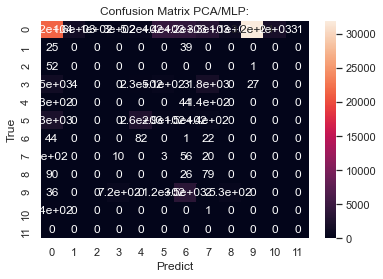

In [48]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(_pca_mlp,annot=True,ax=ax)

ax.set_title('Confusion Matrix PCA/MLP:') 
ax.set_xlabel('Predict') 
ax.set_ylabel('True') 

In [49]:
y_pred_pcamlp_vectorized=model_classifier.predict_proba(x_test_preprocess_model)#.argmax(axis=1)

In [50]:
y_test_vectorized = pd.get_dummies(y_test.astype(str), prefix='Label')

In [51]:
if y_test_vectorized.shape[1] < 2:    
    y_test_vectorized_aux = y_test_vectorized.copy()
    y_test_vectorized_aux['count_'] = 1
    y_test_vectorized_aux.groupby(0).count()

In [52]:
y_test_vectorized

,Label_0,Label_1,Label_10,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
86846,1,0,0,0,0,0,0,0,0,0,0
86847,1,0,0,0,0,0,0,0,0,0,0
86848,1,0,0,0,0,0,0,0,0,0,0
86849,1,0,0,0,0,0,0,0,0,0,0


In [53]:
y_pred_pcamlp_vectorized.shape 

(86851, 12)

In [54]:
y_test_vectorized.shape

(86851, 11)

In [55]:
type(y_pred_pcamlp_vectorized)

numpy.ndarray

In [56]:
def ROC_curve_model(n_classes, pred1, y_test_): 
    n_classes = y_test_vectorized.shape[1] 
    pred1 = y_pred_pcamlp_vectorized #          model.predict(x_test)
    y_test_ = y_test_vectorized.values

    t1 = sum(x == 0 for x in pred1 - y_test_) / len(pred1)

    ### MACRO
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], pred1[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    lw = 2
    plt.figure(figsize=(8, 5))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'lawngreen', 'crimson', 'darkviolet', 'mediumblue','darkorchid', 'forestgreen', 'darkcyan', 'skyblue', 'navy', 'seagreen', 'maroon'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i])) #0

    plt.plot([0, 1], [0, 1], 'k--', color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess', (.5, .48), color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve- ')
    plt.legend(loc="lower right")
    plt.show()


In [57]:
ROC_curve_model(y_test_vectorized.shape[1], y_pred_pcamlp_vectorized, y_test_vectorized.values)

ValueError: operands could not be broadcast together with shapes (86851,12) (86851,11) 

# K-Fold Cross Validation 

In [ ]:
def evaluate_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test, cv, X, y):
	# get the model
	model = set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='recall_macro', cv=cv, n_jobs=-1) 
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [ ]:
ideal, _, _ = evaluate_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test, 2, X, y)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,11) # fold = splits
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True)#, random_state=0)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test, cv, X, y)
	# report performance
	print('> folds=%d, recall_macro=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)

In [ ]:
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()